<a href="https://colab.research.google.com/github/shahaklevi/Machine-Learning/blob/main/Exercise_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Exercise 3: Logistic Regression



## Introduction

In this exercise, you will implement logistic regression and apply it to two different datasets.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

### Section 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

The following cell will load the data and corresponding labels:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
students = pd.read_csv("ex2data1.txt", names=["First_Exam", "Second_Exam", "Admission_Status"])
# type casting from pandas series and pandas dataframe to numpy array
X = np.array(students[["First_Exam", "Second_Exam"]])
y = np.array(students["Admission_Status"])
# size of dataset
number_of_samples = y.size
# size of X matrix, m= rows, n= features
m,n = X.shape
print('size of samples: {}'.format(number_of_samples))

size of samples: 100


In [ ]:
students.head()

,First_Exam,Second_Exam,Admission_Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
please visualize the first dataset using the package `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt

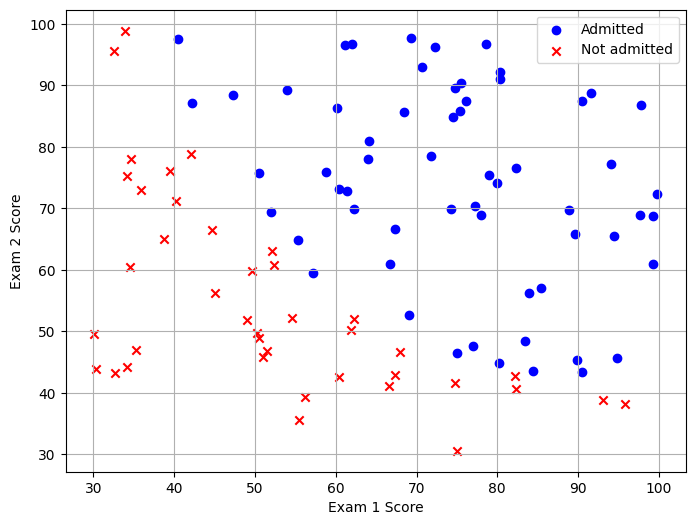

In [ ]:
pos = y == 1
neg = y == 0

plt.figure(figsize=(8,6))
plt.scatter(X[pos,0], X[pos,1], c='b', marker='o', label='Admitted')
plt.scatter(X[neg,0], X[neg,1], c='r', marker='x', label='Not admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**


In [ ]:
def sigmoid(z):
    z = np.array(z)
    g = 1.0 / (1.0 + np.exp(-z))
    return g

In [ ]:
# test sigmoid function
z = 0
g = sigmoid(z)

print("Actual value of sigmoid(0) should be 0.5")
print("Computed value of sigmoid(0) is {sigmoid}".format(sigmoid= g))

Actual value of sigmoid(0) should be 0.5
Computed value of sigmoid(0) is 0.5


#### 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X.


In [ ]:
# add intercept term to martix X
X = np.concatenate([np.ones((len(X), 1)), X], axis= 1)
### make  theta_0 as the bias term
theta = np.zeros(n+1)

Note that the parameter $\theta_0$ represents the bias term in the model's weights.
Now, complete the code for the function `cost_function` to return the cost value and define `gradient_descent` to reteun gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [ ]:
def cost_function(theta, X, y):
    m = y.size                         # number of examples (m)
    h = sigmoid(X.dot(theta))          # vector h = g(Xθ), shape (m,)
    epsilon = 1e-10                    # Small value to avoid log(0)
    term1 = -y * np.log(h + epsilon)             # −y·log(h)
    term2 = (1 - y) * np.log(1 - h + epsilon)    # (1−y)·log(1−h)
    J = np.sum(term1 - term2) / m      # J(θ) = (1/m) ∑ [−y·log(h) − (1−y)·log(1−h)]
    return J

In [ ]:
def gradient_descent(theta, X, y):
    m = y.size
    # Compute the hypothesis vector h = sigmoid(X · theta)
    h = sigmoid(X.dot(theta))
    # Compute the gradient: X^T · (h – y) scaled by 1/m
    grad = (X.T.dot(h - y)) / m
    return grad

In [ ]:
### check the gradient and with theta=np.zeros(n+1)
theta = np.zeros(n+1)
gradient_descent(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [ ]:
initial_theta = np.zeros(n+1)
grad = gradient_descent(initial_theta, X, y)
cost = cost_function(initial_theta,X,y)
print("Shape of cost value is: {}".format(cost))
print("Shape of grad is: {}".format(grad.shape))

Shape of cost value is: 0.6931471803599452
Shape of grad is: (3,)


### calculate the optimal theta using stochastic gradient deacent




In [ ]:
def train_using_sgd(theta, X, y, learning_rate=0.0074, epochs=500):
    m, n = X.shape
    opt_theta = theta.copy()
    opt_cost = cost_function(opt_theta, X, y)
    # Assuming your gradient function is called 'gradient_descent'
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = X_shuffled[i, :].reshape(1, -1)
            yi = y_shuffled[i:i+1]

            # Calculate the gradient using 'gradient_descent' function
            grad = gradient_descent(theta, xi, yi)

            theta = theta - learning_rate * grad
            cureent_cost = cost_function(theta, X, y)
            if cureent_cost < opt_cost:
                opt_theta = theta.copy()
                opt_cost = cureent_cost
    return opt_theta
initial_theta = np.zeros(X.shape[1])
theta_optimized = train_using_sgd(initial_theta, X, y)

In [ ]:
print("Optimized theta is: {}".format(theta_optimized))
optimized_cost = cost_function(theta_optimized, X, y)
print("Optimized Cost value is: {:.4f}".format(optimized_cost))

Optimized theta is: [-22.3539434    0.18330521   0.17809787]
Optimized Cost value is: 0.2050


### Plot the decision boundary obtained from the logistic regression model trained using gradient descent

---



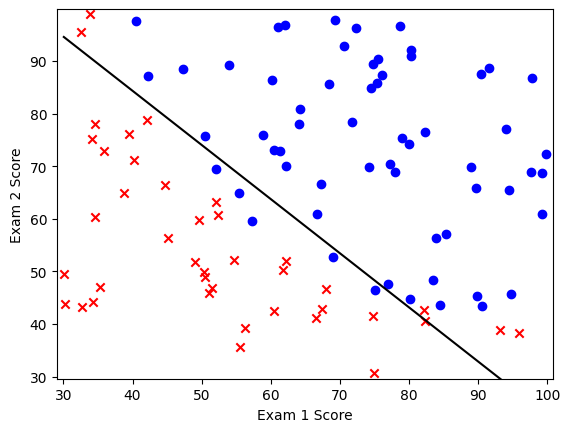

In [ ]:
# ... (your training code to get theta_optimized) ...

# Plot the decision boundary
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)  # Exam 1 score range
y_values = -(theta_optimized[0] + theta_optimized[1] * x_values) / theta_optimized[2]  # Check theta indices!
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

# Plot the data points
pos = y == 1
neg = y == 0
plt.scatter(X[pos, 1], X[pos, 2], c='b', marker='o', label='Admitted')  # Check feature indices!
plt.scatter(X[neg, 1], X[neg, 2], c='r', marker='x', label='Not admitted') # Check feature indices!

# Add labels and axis limits
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.xlim(X[:, 1].min() - 1, X[:, 1].max() + 1)  # Adjust limits as needed
plt.ylim(X[:, 2].min() - 1, X[:, 2].max() + 1)  # Adjust limits as needed
plt.show()

#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 53 and an Exam 2 score of 94, print the admission
probability.

In [ ]:
def predict(theta, X):
    h = sigmoid(X.dot(theta))
    return h >= 0.5
# prediction = sigmoid(np.array([1, 53, 94]).dot(theta_optimized))
# print("Predicted admission probability: {:.3f}".format(prediction))

In [ ]:
def accuracy(y_pred, y):
    """
    check prediction accuracy with comparison between predict and actual value
    if two parameter(predicted and actual value) are equal diff will be 0 and
    otherwise will be 1. count of nonzero devided by len of diff is errors. 1 minus
    error is our prediction accuracy

    Parameters
    ----------
    y_pred : array_like
        Predicted values that output of predict function.

    y : array_like
        Actual value of data, (Labels)

    Returns
    -------
    number : float
        model accuracy percentage
    """
    diff = y_pred == y  # Compare predicted and actual values
    errors = np.count_nonzero(diff == 0)  # Count incorrect predictions
    accuracy = 1 - (errors / len(diff))  # Calculate accuracy
    return accuracy

After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [ ]:
# Predict probability for a student with score 45 on exam 1
# and score 85 on exam 2
# I habe understand that we shuould print the probability for 53,94
student_data = np.array([1, 53, 94])
admission = sigmoid(student_data.dot(theta_optimized))
accuracy_prediction = accuracy(predict(theta_optimized, X), y)
print("Predicted admission probability: {:.3f}".format(admission))
print("Accuracy: {:.2f}%".format(accuracy_prediction * 100))

Predicted admission probability: 0.984
Accuracy: 90.00%


plot the AUC and the ROC curve on your model

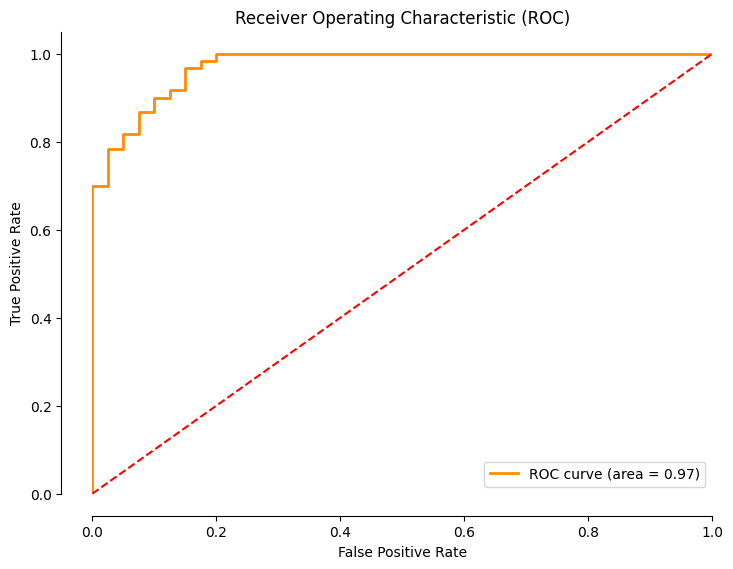

AUC: 0.9733333333333334


In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def predict_proba(theta, X):
    """
    Predicts the probability of positive class for each example in X.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters.
    X : array_like
        The data set.

    Returns
    -------
    probs : array_like
        Probabilities of positive class for each example.
    """
    return sigmoid(X.dot(theta))

# Get predicted probabilities for the positive class
probs = predict_proba(theta_optimized, X)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y, probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC curve and diagonal
ax.plot(fpr, tpr, color='darkorange', lw=2,
        label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'r--')

# set your standard limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# OFFSET: move axes intersection away from (0, 0)
offset_x = -0.05  # shift right by 0.02
offset_y = -0.05  # shift up by 0.02
ax.spines['left'].set_position(('data', offset_x))
ax.spines['bottom'].set_position(('data', offset_y))

# hide the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# labels, title, legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc='lower right')

plt.show()

print("AUC:", roc_auc)



```
# This is formatted as code
```

## Section 2 Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [ ]:
microchips= pd.read_csv("ex2data2.txt", names=["First_Test", "Second_Test", "Status"])
# type casting from pandas series and pandas dataframe to numpy array
X = np.array(microchips[["First_Test", "Second_Test"]])
y = np.array(microchips["Status"])
# size of dataset
number_of_samples = y.size
# size of X matrix, m= rows, n= features
m,n = X.shape
print('size of samples: {}'.format(number_of_samples))

size of samples: 118


### 2.1 Visualize the data

Similar to the previous parts of this exercise, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

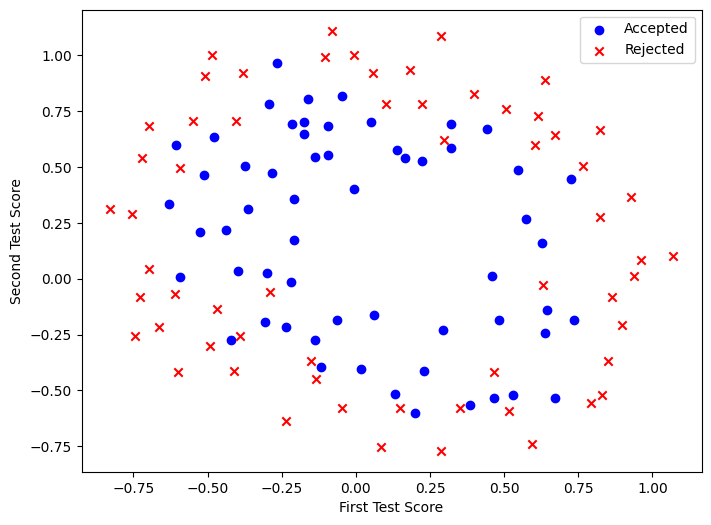

In [ ]:
import matplotlib.pyplot as plt

# Assuming X[:, 0] and X[:, 1] are the two test scores
# and y is the admission status (0 or 1)

pos = y == 1  # Indices of positive examples
neg = y == 0  # Indices of negative examples

plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Plot positive examples with blue circles
plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='o', label='Accepted')

# Plot negative examples with red crosses
plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='x', label='Rejected')

# Set labels and title
plt.xlabel('First Test Score')
plt.ylabel('Second Test Score')

# Add a legend
plt.legend(loc='upper right')  # Adjust legend location if needed

# Display the plot
plt.show()

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. In the function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{map_feature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [ ]:
### make the map feature function

In [ ]:
def map_feature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
        # Ensure X1 and X2 are numpy arrays
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)

    # Get the number of samples
    m = X1.size

    # Initialize the output matrix with a column of ones (intercept term)
    out = np.ones((m, 1))

    # Create polynomial features up to the specified degree
    for i in range(1, degree + 1):
        for j in range(i + 1):
            # Create new column with X1^(i-j) * X2^j
            new_feat = (X1 ** (i - j)) * (X2 ** j)
            # Add new column to the output matrix
            out = np.hstack((out, new_feat.reshape(-1, 1)))

    return out


In [ ]:
X = map_feature(X[:, 0], X[:, 1])

### 2.3 Cost function and gradient
Note that the parameter $\theta_0$ represents the bias term in the model's weights.
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `cost_function_gradient_descent_regularized` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [ ]:
def cost_function_gradient_descent_regularized(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total
        number of polynomial features.

    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).

    y : array_like
        The data labels. A vector with shape (m, ).

    lambda_ : float
        The regularization parameter.

    Returns
    -------
    J : float
        The computed value for the regularized cost function.

    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # Hypothesis
    z = X.dot(theta)
    h = sigmoid(z)

    # Cost without regularization
    cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
    J = (1 / m) * np.sum(cost)

    # Add regularization term (exclude theta[0])
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    J += reg_term

    # Gradient without regularization
    error = h - y
    grad = (1 / m) * (X.T.dot(error))

    # Regularization for gradient (exclude theta[0])
    reg_vector = (lambda_ / m) * theta
    reg_vector[0] = 0
    grad += reg_vector

    return J, grad

#### 2.3.1 Learning parameters using momentum

Similar to the previous parts, you will optimize the Regularized logistic regression using the momentum algorithm optimize the model with $\lambda = 1$, $\lambda = 0$

In [ ]:
def train_using_momentum(theta, X, y, learning_rate,beta,lmbda, epochs=1000):
    """
    Perform gradient deacent with momentum to train the Regularized logistic regression model.
    """
# Initialize velocity vector
    v = np.zeros_like(theta)

    for epoch in range(epochs):
        # Compute cost and gradient
        _, grad = cost_function_gradient_descent_regularized(theta, X, y, lmbda)

        # Update velocity using proper momentum formula
        v = beta * v - learning_rate * grad

        # Update parameters
        theta = theta + v

    return theta

In [ ]:
# Compute accuracy on our training set
theta_optimized_1 = train_using_momentum(np.zeros(X.shape[1]), X, y, 0.01,0.9,1)
model_predicted = predict(theta_optimized_1, X)

print("Train Accuracy: {:.1f}".format((np.mean(model_predicted == y) * 100)))
print("Expected accuracy (with lambda = 1): 83.1 % (approx)\n")

Train Accuracy: 83.1
Expected accuracy (with lambda = 1): 83.1 % (approx)



In [ ]:
# Compute accuracy on our training set
theta_optimized_0 = train_using_momentum(np.zeros(X.shape[1]), X, y, 0.01,0.9,0)
model_predicted = predict(theta_optimized_0, X)

print("Train Accuracy: {:.1f}".format((np.mean(model_predicted == y) * 100)))
print("Expected accuracy (with lambda = 0): 83.1 % (approx)\n")

Train Accuracy: 83.1
Expected accuracy (with lambda = 0): 83.1 % (approx)



### plot the decision boundery for $\lambda =1$




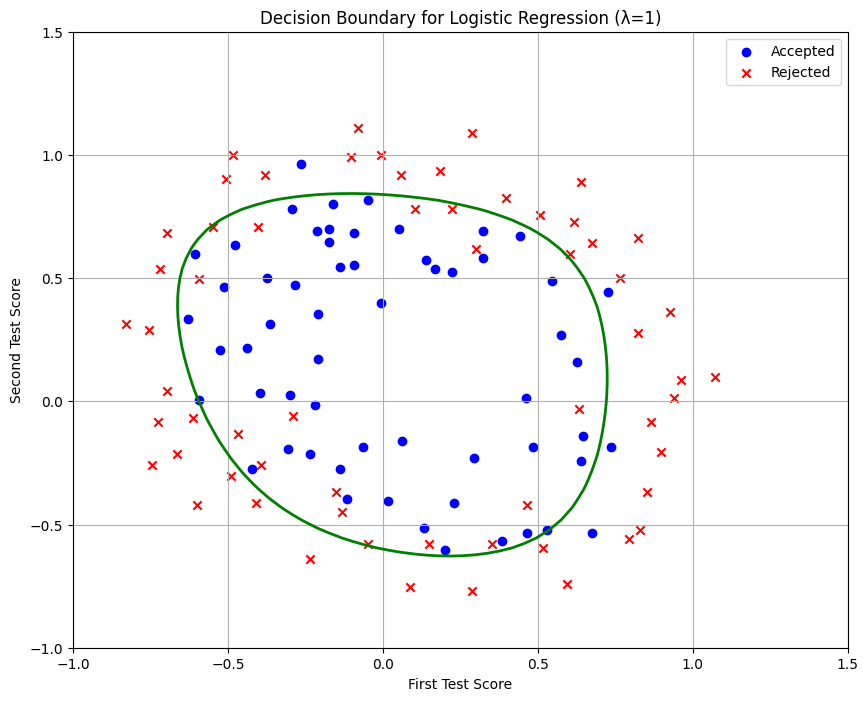

In [ ]:
# Assuming X is your mapped feature matrix, pos and neg are defined,
# and theta_optimized_1 is your trained parameter vector

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Map the meshgrid features (using the same degree as before)
mapped_features_grid = map_feature(xx.ravel(), yy.ravel(), degree=6)

# Predict the class probabilities for the meshgrid points
Z = mapped_features_grid @ theta_optimized_1  # Use matrix multiplication
Z = Z.reshape(xx.shape)  # Reshape to match the meshgrid

# Plot the data points
plt.figure(figsize=(10, 8))

# Plot positive and negative examples
plt.scatter(X[pos, 1], X[pos, 2], c='b', marker='o', label='Accepted')
plt.scatter(X[neg, 1], X[neg, 2], c='r', marker='x', label='Rejected')

# Plot the decision boundary (z = 0 contour)
plt.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2)  # Use xx, yy

# Customize the plot
plt.xlabel('First Test Score')
plt.ylabel('Second Test Score')
plt.title('Decision Boundary for Logistic Regression (λ=1)')
plt.legend()
plt.grid(True)
plt.axis([-1, 1.5, -1, 1.5])  # Adjust axes if needed

plt.show()

### plot the decision boundery for $\lambda=0$




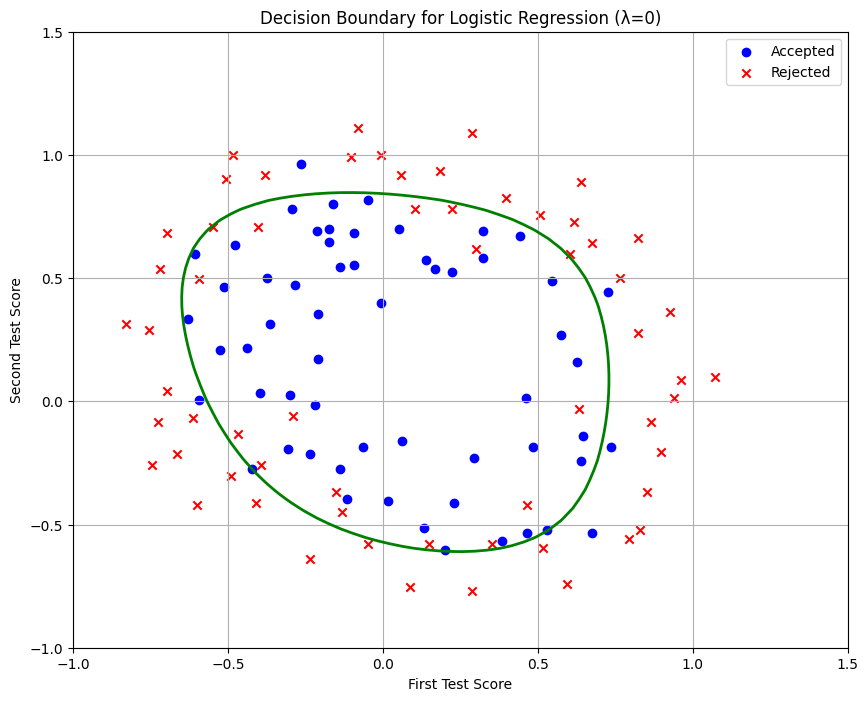

In [ ]:
# Assuming X is your mapped feature matrix, pos and neg are defined,
# and theta_optimized_0 is your trained parameter vector

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Map the meshgrid features (using the same degree as before)
mapped_features_grid = map_feature(xx.ravel(), yy.ravel(), degree=6)

# Predict the class probabilities for the meshgrid points using theta_optimized_0
Z = mapped_features_grid @ theta_optimized_0  # Use matrix multiplication
Z = Z.reshape(xx.shape)  # Reshape to match the meshgrid

# Plot the data points
plt.figure(figsize=(10, 8))

# Plot positive and negative examples
plt.scatter(X[pos, 1], X[pos, 2], c='b', marker='o', label='Accepted')
plt.scatter(X[neg, 1], X[neg, 2], c='r', marker='x', label='Rejected')

# Plot the decision boundary (z = 0 contour)
plt.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2)  # Use xx, yy

# Customize the plot
plt.xlabel('First Test Score')
plt.ylabel('Second Test Score')
plt.title('Decision Boundary for Logistic Regression (λ=0)')  # Update title for lambda=0
plt.legend()
plt.grid(True)
plt.axis([-1, 1.5, -1, 1.5])  # Adjust axes if needed

plt.show()

<ipython-input-31-c7aaee9b34b5>:41: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_0, levels=[0], colors='g', linewidths=2, label='Decision Boundary (λ=0)')
<ipython-input-31-c7aaee9b34b5>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_1, levels=[0], colors='m', linewidths=2, label='Decision Boundary (λ=1)')  # Magenta color


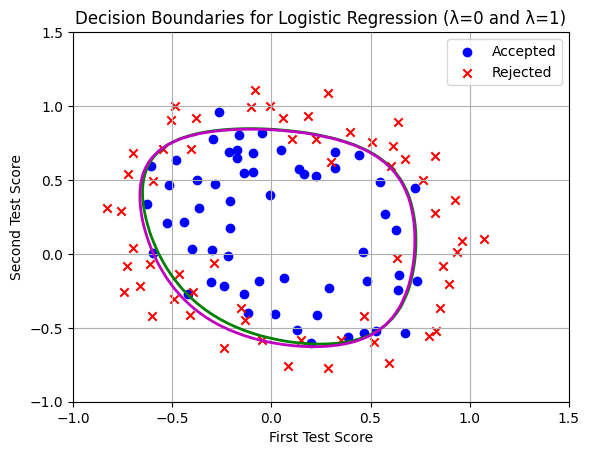

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Your previous code, including map_feature, training, etc.) ...

def plot_decision_boundaries(X, y, theta_optimized_0, theta_optimized_1, degree=6):
    """Plots the decision boundaries for logistic regression with λ=0 and λ=1.

    Parameters:
    X: The feature matrix.
    y: The target variable vector.
    theta_optimized_0: The learned parameters for the model with λ=0.
    theta_optimized_1: The learned parameters for the model with λ=1.
    degree: The degree of the polynomial features (default: 6).
    """
    pos = y == 1
    neg = y == 0

    # Plot the positive and negative examples
    plt.scatter(X[pos, 1], X[pos, 2], c='b', marker='o', label='Accepted')
    plt.scatter(X[neg, 1], X[neg, 2], c='r', marker='x', label='Rejected')

    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Map the meshgrid features (using the same degree as before)
    mapped_features_grid = map_feature(xx.ravel(), yy.ravel(), degree=degree)

    # Predict Z values for both models
    Z_0 = mapped_features_grid @ theta_optimized_0  # For λ=0
    Z_1 = mapped_features_grid @ theta_optimized_1  # For λ=1

    # Reshape Z values to match the meshgrid
    Z_0 = Z_0.reshape(xx.shape)
    Z_1 = Z_1.reshape(xx.shape)

    # Plot the decision boundaries with different colors
    plt.contour(xx, yy, Z_0, levels=[0], colors='g', linewidths=2, label='Decision Boundary (λ=0)')
    plt.contour(xx, yy, Z_1, levels=[0], colors='m', linewidths=2, label='Decision Boundary (λ=1)')  # Magenta color

    # Customize the plot
    plt.xlabel('First Test Score')
    plt.ylabel('Second Test Score')
    plt.title('Decision Boundaries for Logistic Regression (λ=0 and λ=1)')
    plt.legend()
    plt.grid(True)
    plt.axis([-1, 1.5, -1, 1.5])  # Adjust axes if needed

    plt.show()

# Call the function to plot both boundaries
plot_decision_boundaries(X, y, theta_optimized_0, theta_optimized_1)